# Data Processing

Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn

Load the dataset.

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/astronomical_data_mining_project/first_train_index_20180131.csv")
df1.head(10)

,id,type
0,696220,star
1,911466,star
2,915856,star
3,720026,star
4,1198160,star
5,1021824,star
6,1248386,star
7,844969,star
8,1003732,star
9,792881,star


Picking up the status of the collected band files from the ***index*** file 
(csv). Then making a dataframe of the dataset and save them as ***correct_index.csv*** file.

In [ ]:
file_name = []
for i in range(len(os.listdir("/content/drive/MyDrive/astronomical_data_mining_project/first_train_data"))):
    file_name.append(eval(os.listdir("/content/drive/MyDrive/astronomical_data_mining_project/first_train_data")[i].strip(".txt")))

df2 = df1.loc[df1["id"].isin(file_name)]
df2.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/correct_index.csv", index=False)
df2.head()

,id,type
8,1003732,star
20,1012114,star
59,1010478,star
77,1013475,star
80,1001826,star


Now add the spectrum data into the csv file according to their index id. After that making another dataframe of these filted dataset and save it as a csv file.

In [ ]:
X = []
for i in df2["id"]:
    d = []
    files = open("/content/drive/MyDrive/astronomical_data_mining_project/first_train_data/" + str(i) +".txt", "r")
    for j in files.readline().split(","):
        d.append(eval(j))
    X.append(d)
X = np.array(X)

df3 = pd.DataFrame(X)
df3["id"] = df2.id
df3.insert(0, "id", df3.pop("id"))

df3["type"] = df2["type"]
df3.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/filtered_data.csv")

df3.head()

,id,0,1,2,3,4,5,6,7,8,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,type
0,NaN,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,...,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,NaN
1,NaN,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,...,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,NaN
2,NaN,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,...,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,NaN
3,NaN,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,...,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,NaN
4,NaN,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,...,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,NaN


Visualize a sample of the dataset how it looks like.

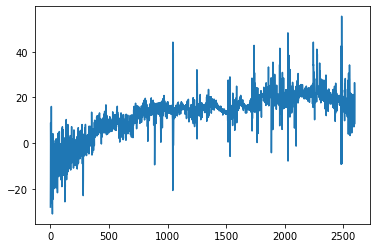

In [ ]:
d = []
files = open("/content/drive/MyDrive/astronomical_data_mining_project/first_train_data/1000000.txt", "r")
for i in files.readline().split(","):
    d.append(eval(i))

plt.plot(d)
plt.show()

# Work after filtering the Data

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/astronomical_data_mining_project/filtered_data.csv")
df1.head(20)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2602) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,0,1,2,3,4,5,6,7,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,type
0,0,NaN,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,...,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,NaN
1,1,NaN,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,...,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,NaN
2,2,NaN,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,...,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,NaN
3,3,NaN,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,...,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,NaN
4,4,NaN,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,...,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,NaN
5,5,NaN,13.332569,11.753398,-8.483814,19.541529,6.735845,14.887184,4.114569,8.087817,...,127.535282,127.992023,131.171180,129.048552,122.147329,118.392666,117.625249,120.435792,130.043564,NaN
6,6,NaN,195.097925,170.802714,214.074985,235.426298,203.474028,225.753422,237.192210,153.110350,...,170.679201,170.847441,166.915375,167.287951,165.623210,159.093652,161.415195,167.469554,165.071187,NaN
7,7,NaN,131.778964,102.044295,137.822866,153.061205,130.819393,122.643173,127.467978,103.695964,...,109.761635,106.639443,107.551580,103.328157,99.543652,98.286474,102.447471,106.421916,105.347656,NaN
8,8,1003732.0,420.828624,616.340761,24.531266,358.582892,226.315032,-71.464159,87.253990,293.675830,...,43.382511,37.227539,30.304068,15.283952,21.252105,46.727856,47.765440,36.080303,33.050362,star
9,9,NaN,-22.241258,49.649909,28.380738,-26.223556,-6.589805,-14.920251,40.295049,-38.219867,...,80.044756,83.523686,82.088314,79.057913,82.144016,82.116324,79.859718,79.452451,72.382202,NaN


In [ ]:
df1 = df1.drop(["Unnamed: 0", "id", "type"], axis=1)
df1

,0,1,2,3,4,5,6,7,8,9,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,42.753681,...,64.180058,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096
1,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,333.472957,...,463.628318,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102
2,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,919.115600,...,479.905961,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780
3,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,140.674932,...,2124.095762,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660
4,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,8.963254,...,8.829281,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,32.818301,...,335.269864,330.418627,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174
9996,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,191.867945,...,83.703287,78.612264,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790
9997,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,320.717665,...,119.858559,110.699663,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294
9998,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,254.692949,...,225.020414,227.126399,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/astronomical_data_mining_project/correct_index.csv")
df2

,id,type
0,1003732,star
1,1012114,star
2,1010478,star
3,1013475,star
4,1001826,star
...,...,...
9995,1011166,star
9996,1011003,star
9997,1006484,star
9998,1010239,star


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   type    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [ ]:
df1["id"] = df2["id"]
df1

,0,1,2,3,4,5,6,7,8,9,...,2591,2592,2593,2594,2595,2596,2597,2598,2599,id
0,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,42.753681,...,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,1003732
1,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,333.472957,...,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,1012114
2,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,919.115600,...,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,1010478
3,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,140.674932,...,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,1013475
4,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,8.963254,...,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,1001826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,32.818301,...,330.418627,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174,1011166
9996,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,191.867945,...,78.612264,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790,1011003
9997,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,320.717665,...,110.699663,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294,1006484
9998,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,254.692949,...,227.126399,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746,1010239


In [ ]:
df1.insert(0, "id", df1.pop("id"))
df1

,id,0,1,2,3,4,5,6,7,8,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,1003732,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,...,64.180058,63.781101,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096
1,1012114,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,...,463.628318,473.133664,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102
2,1010478,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,...,479.905961,474.770945,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780
3,1013475,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,...,2124.095762,2143.943153,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660
4,1001826,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,...,8.829281,7.468860,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1011166,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,...,335.269864,330.418627,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174
9996,1011003,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,...,83.703287,78.612264,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790
9997,1006484,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,...,119.858559,110.699663,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294
9998,1010239,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,...,225.020414,227.126399,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746


Converting the data types of the ***type*** column into *categorical*.

In [ ]:
df1["type"] = df2["type"].astype("category")
df1.dtypes

id         int64
0        float64
1        float64
2        float64
3        float64
          ...   
2596     float64
2597     float64
2598     float64
2599     float64
type    category
Length: 2602, dtype: object

Now encoding this categorical column.

In [ ]:
df1["type_category"] = df1["type"].cat.codes
df1

,id,0,1,2,3,4,5,6,7,8,...,2592,2593,2594,2595,2596,2597,2598,2599,type,type_category
0,1003732,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,21.917653,...,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,star,2
1,1012114,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,442.739573,...,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,star,2
2,1010478,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,779.060542,...,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,star,2
3,1013475,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,245.963538,...,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,star,2
4,1001826,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,6.419458,...,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,star,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1011166,56.634618,17.767603,32.697765,102.653269,86.900047,-7.775973,53.095181,94.180916,-47.081932,...,326.793333,321.688509,304.854811,292.384946,298.564089,303.588999,298.312277,304.220174,star,2
9996,1011003,135.789058,174.621573,187.832099,202.452037,196.802113,234.001058,205.252376,179.944856,145.471086,...,82.259806,83.874910,83.422134,81.554595,85.621103,85.185739,80.110783,94.154790,star,2
9997,1006484,244.418307,321.622381,297.454014,335.700003,298.094204,306.042112,375.882266,306.347536,356.232424,...,109.368864,115.441900,125.251659,120.673072,118.692345,115.199357,115.444263,119.704294,star,2
9998,1010239,375.362477,240.881277,164.797330,216.840804,345.062354,211.341449,251.472212,-125.765719,195.138919,...,213.293893,213.912408,199.233762,185.039440,162.756722,151.156361,184.163020,217.002746,star,2


Checking how many astronomical object types we have in this dataset.

In [ ]:
df1["type"].unique()

['star', 'unknown', 'galaxy', 'qso']
Categories (4, object): ['galaxy', 'qso', 'star', 'unknown']

Saving the dataset as our final ***filtered*** datatset as ***filtered_data.csv***.

In [ ]:
df1.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/filtered_data.csv")

star = 2

galaxy = 0

qso = 1

unknown = 3


# Training Work

Importing the libraries.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import f1_score

Load the cleaned dataset.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/astronomical_data_mining_project/filtered_data.csv")
data.head()

,Unnamed: 0,id,0,1,2,3,4,5,6,7,...,2592,2593,2594,2595,2596,2597,2598,2599,type,type_category
0,0,1003732,48.655049,77.465327,4.208176,28.167326,13.427476,-14.843227,-43.033583,41.060205,...,62.589485,68.359386,67.219323,59.163781,52.683182,56.071411,56.874488,51.587096,star,2
1,1,1012114,389.791377,525.115951,556.413885,640.106041,574.939896,619.203059,576.397330,584.008697,...,490.925146,477.456984,460.970120,456.736437,458.069753,463.685441,480.638088,488.560102,star,2
2,2,1010478,675.787795,904.323835,1000.683814,1073.930671,953.734846,1113.128463,1141.062535,955.920329,...,483.501453,474.548576,450.304638,424.318466,426.743848,445.006674,459.148188,470.698780,star,2
3,3,1013475,159.638698,1571.754420,615.359660,923.051992,542.125164,286.349805,558.800513,1313.924618,...,2097.024649,2121.499620,2146.877413,2003.223530,1908.783962,1878.366433,1873.030257,1971.686660,star,2
4,4,1001826,18.469157,0.837445,35.728355,1.769646,20.082407,15.088073,16.233921,28.813962,...,7.193241,5.860142,5.625553,5.494465,5.317929,6.596331,6.582030,5.569342,star,2


Separting the dataset into the input and the output data.

In [ ]:
X = data.drop(["Unnamed: 0", "id", "type", "type_category"], axis=1)
Y = data["type_category"]

print("Shape of input data: ", X.shape)
print("Shape of output data: ", Y.shape)

Now split the input and the output data into the tarin and the test data.

In [ ]:
X_train, X_test, y_train, y_test = tts(X, Y, test_size=0.20, shuffle=True)

print("Shape of X_train data: ", X_train.shape)
print("Shape of X_test data: ", X_test.shape)
print("Shape of y_train data: ", y_train.shape)
print("Shape of y_test data: ", y_test.shape)

Shape of X_train data:  (8000, 2600)
Shape of X_test data:  (2000, 2600)
Shape of y_train data:  (8000,)
Shape of y_test data:  (2000,)


Desgning the architecture of the proposed Artificial Neural Network model.

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1028, activation="relu", input_shape=[X_train.shape[1]]),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(4, activation="softmax")

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1028)              2673828   
                                                                 
 dense_1 (Dense)             (None, 512)               526848    
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 3,202,728
Trainable params: 3,202,728
Non-trainable params: 0
_________________________________________________________________


Compiling the model and training the model according to the condition passed.

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00001)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = opt,
    metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')

            
            


# Train the Model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/1000
250/250 [==============================] - 3s 9ms/step - loss: 258513.4219 - accuracy: 0.9084 - val_loss: 8.3011 - val_accuracy: 0.9335
Epoch 2/1000
250/250 [==============================] - 2s 8ms/step - loss: 162701.2656 - accuracy: 0.9178 - val_loss: 7.7613 - val_accuracy: 0.9350
Epoch 3/1000
250/250 [==============================] - 2s 8ms/step - loss: 123958.7969 - accuracy: 0.9195 - val_loss: 6.5791 - val_accuracy: 0.9380
Epoch 4/1000
250/250 [==============================] - 2s 8ms/step - loss: 52025.5977 - accuracy: 0.9205 - val_loss: 7.3044 - val_accuracy: 0.9380
Epoch 5/1000
250/250 [==============================] - 2s 8ms/step - loss: 17.8247 - accuracy: 0.9244 - val_loss: 7.7431 - val_accuracy: 0.9365
Epoch 6/1000
250/250 [==============================] - 2s 8ms/step - loss: 40.2888 - accuracy: 0.9250 - val_loss: 5.4976 - val_accuracy: 0.9350
Epoch 7/1000
250/250 [==============================] - 2s 8ms/step - loss: 16.6176 - accuracy: 0.9249 - val_loss: 

Saving the model as ***astronomical_model.h5***.

In [ ]:
model.save("/content/drive/MyDrive/astronomical_data_mining_project/astronomical_model.h5")

Visualize the training period how the performance was while training the model.

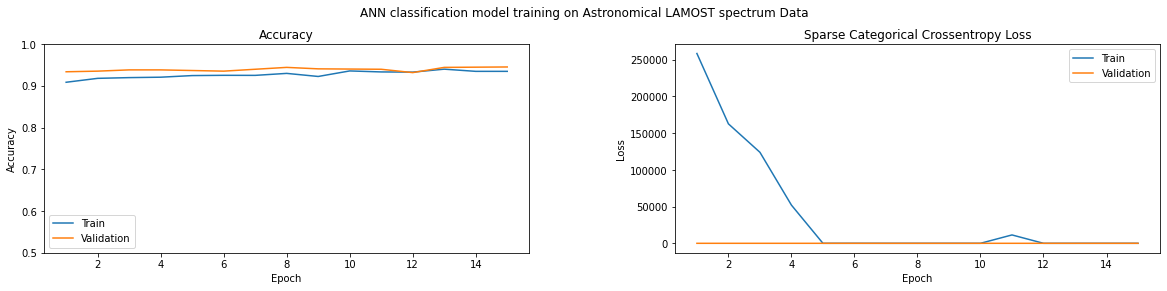

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('ANN classification model training on Astronomical LAMOST spectrum Data', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = range(1, len(history.history["accuracy"])+1)

ax1.plot(epochs, history.history['accuracy'], label='Train')
ax1.plot(epochs, history.history['val_accuracy'], label='Validation')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
ax1.set_yticks(np.arange(start=0.5, stop=1.05, step=0.1))
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train')
ax2.plot(epochs, history.history['val_loss'], label='Validation')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Sparse Categorical Crossentropy Loss')
l2 = ax2.legend(loc="best")

plt.savefig("/content/drive/MyDrive/astronomical_data_mining_project/model_training_analysis.png")

Calculate the confusion matrix on predicting the test dataset.

In [ ]:
p = model.predict(X_test)
# predicted labels in a 1D list
p_r = []

for i in range(p.shape[0]):
    p_r.append(np.where(p[i] == np.max(p[i]))[0][0])




confusion_matrix(y_test, p_r)


array([[   3,    0,   16,    3],
       [   1,    0,    1,    2],
       [   5,    1, 1804,   36],
       [   5,    3,   37,   83]])

Visualizing the calculated confusion matrix above by plotting.

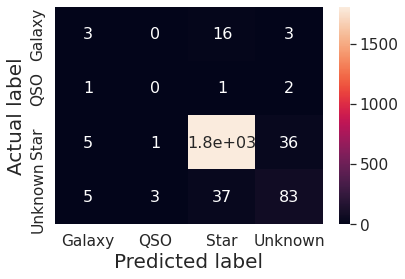

In [ ]:
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm, index=["Galaxy", "QSO", "Star", "Unknown"], columns=["Galaxy", "QSO", "Star", "Unknown"])
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)

    plt.show()

print_confusion_matrix(y_test, p_r)

Calculating f1_score on every categories. There were 4 categories in the dataset we have been worked.

In [ ]:
f1_score(y_test, p_r, average=None)

array([0.16666667, 0.        , 0.97408207, 0.65873016])

# Work on the completely different Test Dataset.

Filtering this dataset as similar way we did on the train dataset previously.

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/astronomical_data_mining_project/first_test_index_20180131.csv")
df4.head()

,id
0,822405
1,1142964
2,1241977
3,1309049
4,1085810


In [ ]:
file_name = []
for i in range(len(os.listdir("/content/drive/MyDrive/astronomical_data_mining_project/first_test_data"))):
    file_name.append(eval(os.listdir("/content/drive/MyDrive/astronomical_data_mining_project/first_test_data")[i].strip(".txt")))

df5 = df4.loc[df4["id"].isin(file_name)]
df5.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/test_correct_index.csv", index=False)
df5.head()

,id
19,1006689
39,1013435
83,1001420
279,1004983
350,1000138


In [ ]:
X = []
for i in df5["id"]:
    d = []
    files = open("/content/drive/MyDrive/astronomical_data_mining_project/first_test_data/" + str(i) +".txt", "r")
    for j in files.readline().split(","):
        d.append(eval(j))
    X.append(d)
X = np.array(X)

df6 = pd.DataFrame(X)
# df6["id"] = df5["id"]
# df6.insert(0, "id", df6.pop("id"))


df6.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/test_filtered_data.csv")

df6.head()

,0,1,2,3,4,5,6,7,8,9,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,19.734045,59.360678,28.056671,68.355714,54.640801,54.837360,51.371540,47.350746,29.844890,38.848072,...,1113.644823,1122.218571,1133.524597,1134.821361,1096.913790,1044.269314,1028.416069,1060.272454,1117.760202,1161.784832
1,-18.078132,306.344339,217.845188,58.651437,786.755028,569.990547,-32.763374,782.750477,184.880904,59.605239,...,554.764032,554.755253,556.061860,546.748199,535.014947,538.527411,531.560191,516.174193,535.874688,560.256785
2,132.678144,310.075164,198.026647,70.494018,322.640706,180.456414,221.340080,129.259001,82.188201,278.670244,...,520.260759,510.611922,505.125788,519.601764,496.780241,502.585686,505.506591,480.552457,485.120015,496.665788
3,778.223399,690.457123,841.799244,839.663212,603.308073,1335.150680,909.790522,1090.156078,226.897116,356.583025,...,1252.534666,1278.640827,1271.610050,1216.201373,1179.820760,1128.066249,1088.428066,1052.411711,1079.938250,1228.515010
4,3001.574241,2228.711408,2918.112399,3197.555611,2987.000554,4248.426252,3411.591750,3864.312028,3547.686552,2990.853173,...,1761.006371,1718.315130,1749.121260,1706.510164,1675.147524,1687.205981,1702.912341,1683.061970,1667.668347,1720.430111


In [ ]:
df6["id"] = df5[["id"]].to_numpy()
df6.insert(0, "id", df6.pop("id"))

df6.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/test_filtered_data.csv")

In [ ]:
df6.head(10)

,id,0,1,2,3,4,5,6,7,8,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,1006689,19.734045,59.360678,28.056671,68.355714,54.640801,54.837360,51.371540,47.350746,29.844890,...,1113.644823,1122.218571,1133.524597,1134.821361,1096.913790,1044.269314,1028.416069,1060.272454,1117.760202,1161.784832
1,1013435,-18.078132,306.344339,217.845188,58.651437,786.755028,569.990547,-32.763374,782.750477,184.880904,...,554.764032,554.755253,556.061860,546.748199,535.014947,538.527411,531.560191,516.174193,535.874688,560.256785
2,1001420,132.678144,310.075164,198.026647,70.494018,322.640706,180.456414,221.340080,129.259001,82.188201,...,520.260759,510.611922,505.125788,519.601764,496.780241,502.585686,505.506591,480.552457,485.120015,496.665788
3,1004983,778.223399,690.457123,841.799244,839.663212,603.308073,1335.150680,909.790522,1090.156078,226.897116,...,1252.534666,1278.640827,1271.610050,1216.201373,1179.820760,1128.066249,1088.428066,1052.411711,1079.938250,1228.515010
4,1000138,3001.574241,2228.711408,2918.112399,3197.555611,2987.000554,4248.426252,3411.591750,3864.312028,3547.686552,...,1761.006371,1718.315130,1749.121260,1706.510164,1675.147524,1687.205981,1702.912341,1683.061970,1667.668347,1720.430111
5,1001852,489.591224,-157.756334,186.648080,186.299909,272.317735,460.681153,-132.365288,303.572474,283.960156,...,213.174966,213.485205,187.428261,205.852236,210.018185,180.976106,186.448343,201.582719,183.077578,172.776543
6,1011770,766.573961,1168.623180,1060.708288,906.127365,776.268845,-60.336574,721.703469,635.627880,1144.472089,...,338.832930,227.907628,287.293960,314.225179,348.489620,312.997301,390.454957,438.362838,358.807258,312.132834
7,1004956,90.121041,30.437948,169.596987,124.355717,145.228035,141.059848,21.319507,105.377265,69.333916,...,121.471147,116.483358,115.239031,126.330415,124.325313,111.552266,108.722673,112.338284,121.512195,126.225309
8,1003625,2186.487996,2978.338186,3175.494296,3031.147000,2377.155851,3191.604990,3072.087846,2367.381566,1562.300605,...,2641.740467,2561.645608,2517.136251,2592.543043,2334.610597,1934.942758,1704.247123,1736.224403,2162.156038,2641.360880
9,1010883,187.593177,157.034492,315.672084,234.845052,89.927876,247.601463,193.053470,270.245831,142.090098,...,111.671082,106.385066,111.176852,108.990383,107.335761,101.821429,101.575707,102.655645,104.821377,108.402991


Now predicting the output of this filtered dataset.

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/astronomical_data_mining_project/test_filtered_data.csv")

X = test_df.drop(["Unnamed: 0", "id"], axis=1)

test_df.head(10)

,Unnamed: 0,id,0,1,2,3,4,5,6,7,...,2590,2591,2592,2593,2594,2595,2596,2597,2598,2599
0,0,1006689,19.734045,59.360678,28.056671,68.355714,54.640801,54.837360,51.371540,47.350746,...,1113.644823,1122.218571,1133.524597,1134.821361,1096.913790,1044.269314,1028.416069,1060.272454,1117.760202,1161.784832
1,1,1013435,-18.078132,306.344339,217.845188,58.651437,786.755028,569.990547,-32.763374,782.750477,...,554.764032,554.755253,556.061860,546.748199,535.014947,538.527411,531.560191,516.174193,535.874688,560.256785
2,2,1001420,132.678144,310.075164,198.026647,70.494018,322.640706,180.456414,221.340080,129.259001,...,520.260759,510.611922,505.125788,519.601764,496.780241,502.585686,505.506591,480.552457,485.120015,496.665788
3,3,1004983,778.223399,690.457123,841.799244,839.663212,603.308073,1335.150680,909.790522,1090.156078,...,1252.534666,1278.640827,1271.610050,1216.201373,1179.820760,1128.066249,1088.428066,1052.411711,1079.938250,1228.515010
4,4,1000138,3001.574241,2228.711408,2918.112399,3197.555611,2987.000554,4248.426252,3411.591750,3864.312028,...,1761.006371,1718.315130,1749.121260,1706.510164,1675.147524,1687.205981,1702.912341,1683.061970,1667.668347,1720.430111
5,5,1001852,489.591224,-157.756334,186.648080,186.299909,272.317735,460.681153,-132.365288,303.572474,...,213.174966,213.485205,187.428261,205.852236,210.018185,180.976106,186.448343,201.582719,183.077578,172.776543
6,6,1011770,766.573961,1168.623180,1060.708288,906.127365,776.268845,-60.336574,721.703469,635.627880,...,338.832930,227.907628,287.293960,314.225179,348.489620,312.997301,390.454957,438.362838,358.807258,312.132834
7,7,1004956,90.121041,30.437948,169.596987,124.355717,145.228035,141.059848,21.319507,105.377265,...,121.471147,116.483358,115.239031,126.330415,124.325313,111.552266,108.722673,112.338284,121.512195,126.225309
8,8,1003625,2186.487996,2978.338186,3175.494296,3031.147000,2377.155851,3191.604990,3072.087846,2367.381566,...,2641.740467,2561.645608,2517.136251,2592.543043,2334.610597,1934.942758,1704.247123,1736.224403,2162.156038,2641.360880
9,9,1010883,187.593177,157.034492,315.672084,234.845052,89.927876,247.601463,193.053470,270.245831,...,111.671082,106.385066,111.176852,108.990383,107.335761,101.821429,101.575707,102.655645,104.821377,108.402991


In [ ]:
predicted = model.predict(X)
pred_label = []
for i in range(predicted.shape[0]):
    pred_label.append(np.where(predicted[i] == np.max(predicted[i]))[0][0])

Categorize the column accoding to their label we set before. Then saving this dataframe as ***test_final.csv*** file.

In [ ]:
test_pred_label = []
for i in pred_label:
    if i == 0:
        test_pred_label.append("Galaxy")
    elif i == 1:
        test_pred_label.append("QSO")
    elif i == 2:
        test_pred_label.append("Star")
    elif i == 3:
        test_pred_label.append("Unknown")

test_final_df = pd.DataFrame(test_pred_label, columns=["Predicted Type"])
test_final_df["id"] = test_df[["id"]].to_numpy()
test_final_df.insert(0, "id", test_final_df.pop("id"))

test_final_df.head()

,id,Predicted Type
0,1006689,Star
1,1013435,Star
2,1001420,Star
3,1004983,Star
4,1000138,Star


In [ ]:
test_final_df.to_csv("/content/drive/MyDrive/astronomical_data_mining_project/test_final.csv", index=False)